# Connect with Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Required Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.callbacks import ModelCheckpoint

import cv2
import os

import matplotlib.pyplot as plt
import numpy as np

import random
import pickle

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Input Data Sample

Imput Pickled Data
--

In [3]:
pickle_in = open("/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/X.pickle", "rb")
X = pickle.load(pickle_in)
 
pickle_in = open("/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Y.pickle", "rb")
Y = pickle.load(pickle_in)

In [4]:
print('Data: ', len(X), len(Y))

Data:  450 450


Split Data into Train, Test and Validation Sets
--

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.333, random_state=1) #33.3% data as test and validation data

X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.50, random_state=1) #16.7% data as test and 10% as validation data

In [6]:
print('Train:', len(X_train), len(Y_train), '\nTest: ', len(X_test), len(Y_test), '\nValidation: ', len(X_val), len(Y_val))

Train: 300 300 
Test:  75 75 
Validation:  75 75


Sample Data - Train Dataset
--

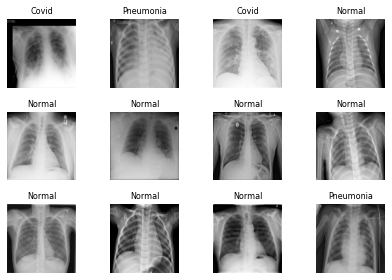

In [7]:
def display_multiple_img(images, rows = 1, cols=1):
    figure, ax = plt.subplots(nrows=rows,ncols=cols )
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_title(title[:-2], fontsize=8)
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

Classes = ["Covid", "Normal", "Pneumonia"]

images = {str(Classes[Y_train[i]])+format(str(i).zfill(2)): X_train[i] for i in range(12)}

display_multiple_img(images, 3, 4)

# Exploitation on first good model found in Optimization

In [8]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-v2-28.hdf5')

In [9]:
from keras.utils.layer_utils import count_params

model.compile(
      loss = "sparse_categorical_crossentropy",
      optimizer = "adam",
      metrics = ["accuracy"],
  )

trainable_count = count_params(model.trainable_weights)
non_trainable_count = count_params(model.non_trainable_weights)

print("Total: ", trainable_count+non_trainable_count, " Trainable: ", trainable_count, " Non-Trainable: ", non_trainable_count)

Total:  14788803  Trainable:  3652739  Non-Trainable:  11136064


# Compile and Train (Exploit)

In [10]:
model.compile(
        loss = "sparse_categorical_crossentropy",
        optimizer = "adam",
        metrics = ["accuracy"],
    )

filepath = '/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-1-{epoch:02d}-performance-{val_accuracy:.2f}-{val_loss:.2f}.hdf5'

checkpoint_acc = ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

checkpoint_loss = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

callbacks = [checkpoint_acc, checkpoint_loss]

epochs = 100
model_records = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_val, Y_val), callbacks=callbacks)


Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.1601 - accuracy: 0.9600
Epoch 1: val_accuracy improved from -inf to 0.69333, saving model to /content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-1-01-performance-0.69-3.98.hdf5

Epoch 1: val_loss improved from inf to 3.98047, saving model to /content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-1-01-performance-0.69-3.98.hdf5
10/10 [==============================] - 34s 1s/step - loss: 0.1601 - accuracy: 0.9600 - val_loss: 3.9805 - val_accuracy: 0.6933
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.3415 - accuracy: 0.9300
Epoch 2: val_accuracy improved from 0.69333 to 0.84000, saving model to /content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-1-02-performance-0.84-1.98.hdf5

Epoch 2: val_loss improved from 3.98047 to 1.97620, saving model to /content/drive/MyDrive/Me

# Learning Visualization

Text(0.5, 1.0, 'Training and Validation Accuracies')

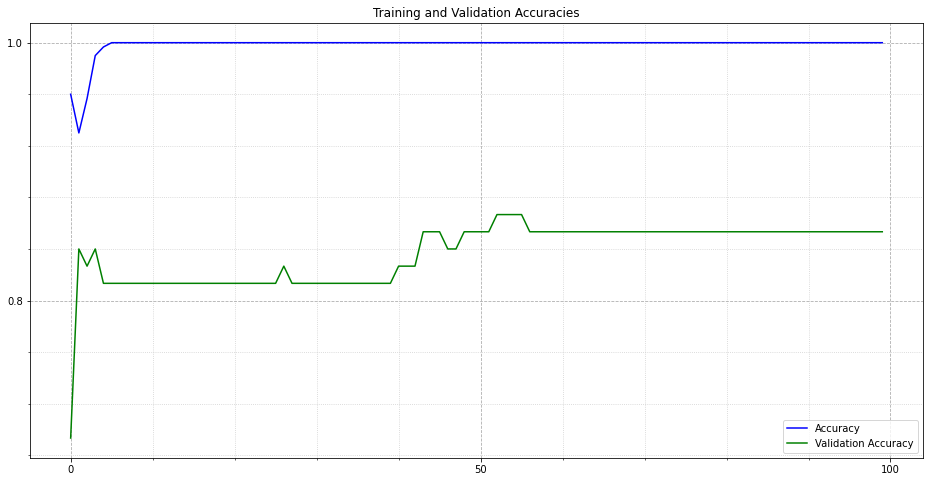

In [11]:
acc_histories = model_records.history['accuracy']
val_acc_histories = model_records.history['val_accuracy']
plt_range = np.arange(0, 100, 1)

#from itertools import chain
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

#plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(figsize=(16, 8))
# plt.plot(plt_range, list(chain.from_iterable(acc_histories)), label='Accuracy')
# plt.plot(plt_range, list(chain.from_iterable(val_acc_histories)), label='Validation Accuracy')
plt.plot(plt_range, acc_histories, label='Accuracy', color="blue")
plt.plot(plt_range, val_acc_histories, label='Validation Accuracy', color="green")



# Change major ticks to show every .10.
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(.20))

# Change minor ticks to show every 10. (10/1 = 10)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#ACACAC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

#plt.grid(True)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracies')

Text(0.5, 1.0, 'Training and Validation Log Losses')

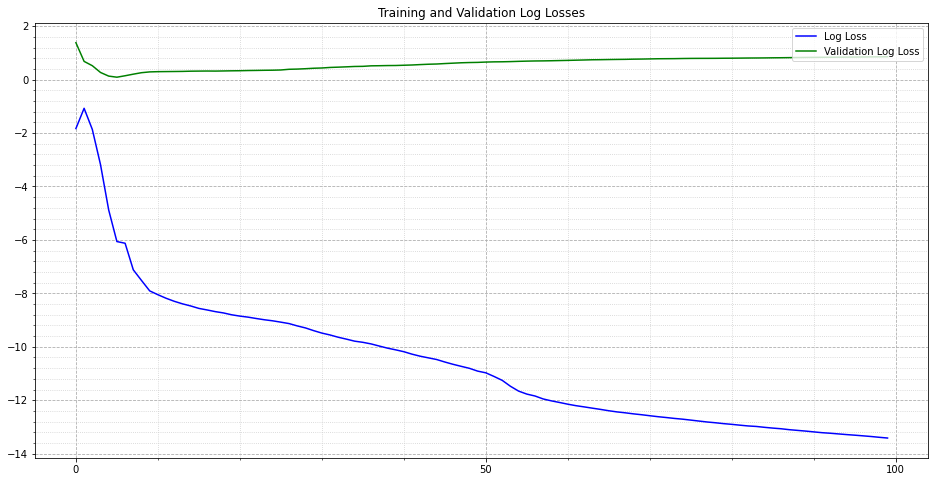

In [12]:
plt_range = range(100)

loss_histories = model_records.history['loss']
val_loss_histories = model_records.history['val_loss']

#from itertools import chain
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import numpy as np

#plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(plt_range, np.log(loss_histories), label='Log Loss', color="blue")
plt.plot(plt_range, np.log(val_loss_histories), label='Validation Log Loss', color="green")



# Change major ticks to show every .10.
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(2))

# Change minor ticks to show every 10. (10/1 = 10)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#ACACAC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

#plt.grid(True)
plt.legend(loc='upper right')
plt.title('Training and Validation Log Losses')

# Performance Measures

In [13]:
tl_model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-1-53-performance-0.87-1.95.hdf5')

In [14]:
predictions = tl_model.predict(X_test) # predict output for all test data

scores = tf.nn.softmax(predictions)
Y_pred = []
for score in scores:
  Y_pred.append(np.argmax(score))
Y_pred = np.array(Y_pred) # predicted labels

In [15]:
Y_true = Y_test # true labels

In [16]:
# Defining function for confusion matrix plot
def plot_confusion_matrix(Y_true, Y_pred, Classes, normalize=False, title=None, cmap=plt.cm.Blues):

    # Compute the confusion matrix
    conf_mat = confusion_matrix(Y_true, Y_pred)
    if normalize:
        conf_mat = conf_mat.astype('float32') / conf_mat.sum(axis=1)[:, np.newaxis]
        print(title)
    else:
        print(title)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(conf_mat.shape[1]), yticks=np.arange(conf_mat.shape[0]),
           xticklabels=Classes, yticklabels=Classes,
           title=title, ylabel='True label', xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
   
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = conf_mat.max() / 2.
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(j, i, format(conf_mat[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_mat[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

np.set_printoptions(precision=2)

Confusion Matrix


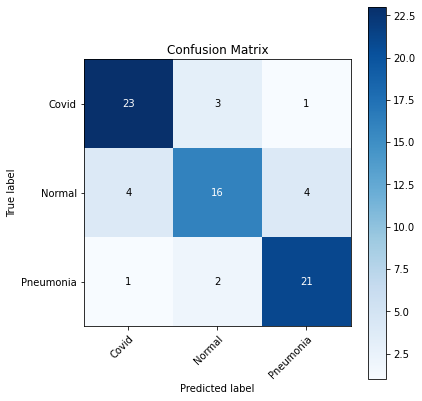

In [17]:
from sklearn.metrics import confusion_matrix

#Plotting the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred)

#Defining the class labels again
Classes = ["Covid", "Normal", "Pneumonia"]

# Plotting non-normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, title='Confusion Matrix')

Confusion Matrix - Normalized


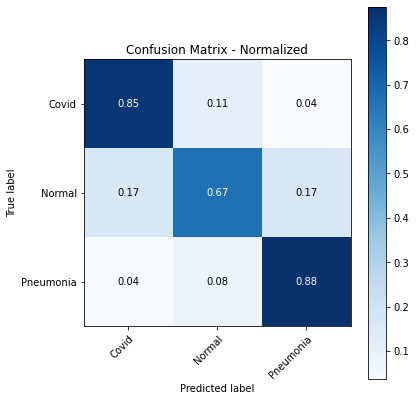

In [18]:
#Plotting normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, normalize = True, title = 'Confusion Matrix - Normalized')

In [19]:
tl_records = tl_model.evaluate(X_test, Y_test)

3/3 [==============================] - 1s 217ms/step - loss: 1.9389 - accuracy: 0.8000


In [20]:
Classes = ["Covid", "Normal", "Pneumonia"]

from sklearn import metrics

def get_metrics(true_labels, predicted_labels):
  print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
  print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'),4))
  print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4))
  print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4))

get_metrics(Y_true, Y_pred)
  
def display_classification_report(true_labels, predicted_labels, Classes):
  report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=Classes)
  print("\nReport:\n"+report)

display_classification_report(Y_true, Y_pred, Classes)

Accuracy: 0.8
Precision: 0.798
Recall: 0.8
F1 Score: 0.7974

Report:
              precision    recall  f1-score   support

       Covid       0.82      0.85      0.84        27
      Normal       0.76      0.67      0.71        24
   Pneumonia       0.81      0.88      0.84        24

    accuracy                           0.80        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.80      0.80      0.80        75



ROC AUC score: 0.8488789034132171


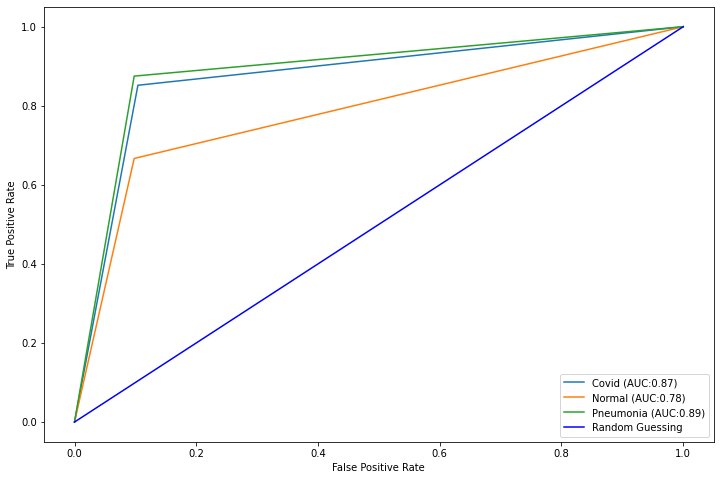

In [21]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= Classes

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  
  for (idx, c_label) in enumerate(target):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
  
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# Exploitation on second good model found in Optimization

In [22]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-v2-3.hdf5')

In [23]:
from keras.utils.layer_utils import count_params

model.compile(
      loss = "sparse_categorical_crossentropy",
      optimizer = "adam",
      metrics = ["accuracy"],
  )

trainable_count = count_params(model.trainable_weights)
non_trainable_count = count_params(model.non_trainable_weights)

print("Total: ", trainable_count+non_trainable_count, " Trainable: ", trainable_count, " Non-Trainable: ", non_trainable_count)

Total:  14788803  Trainable:  3394627  Non-Trainable:  11394176


# Compile and Train (Exploit)

In [24]:
model.compile(
        loss = "sparse_categorical_crossentropy",
        optimizer = "adam",
        metrics = ["accuracy"],
    )

filepath = '/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-2-{epoch:02d}-performance-{val_accuracy:.2f}-{val_loss:.2f}.hdf5'

checkpoint_acc = ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

checkpoint_loss = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

callbacks = [checkpoint_acc, checkpoint_loss]

epochs = 100
model_records = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_val, Y_val), callbacks=callbacks)


Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.6780 - accuracy: 0.8733
Epoch 1: val_accuracy improved from -inf to 0.76000, saving model to /content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-2-01-performance-0.76-0.82.hdf5

Epoch 1: val_loss improved from inf to 0.82478, saving model to /content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-2-01-performance-0.76-0.82.hdf5
10/10 [==============================] - 11s 815ms/step - loss: 0.6780 - accuracy: 0.8733 - val_loss: 0.8248 - val_accuracy: 0.7600
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.2450 - accuracy: 0.9300
Epoch 2: val_accuracy improved from 0.76000 to 0.81333, saving model to /content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-2-02-performance-0.81-0.79.hdf5

Epoch 2: val_loss improved from 0.82478 to 0.79080, saving model to /content/drive/MyDrive

# Learning Visualization

Text(0.5, 1.0, 'Training and Validation Accuracies')

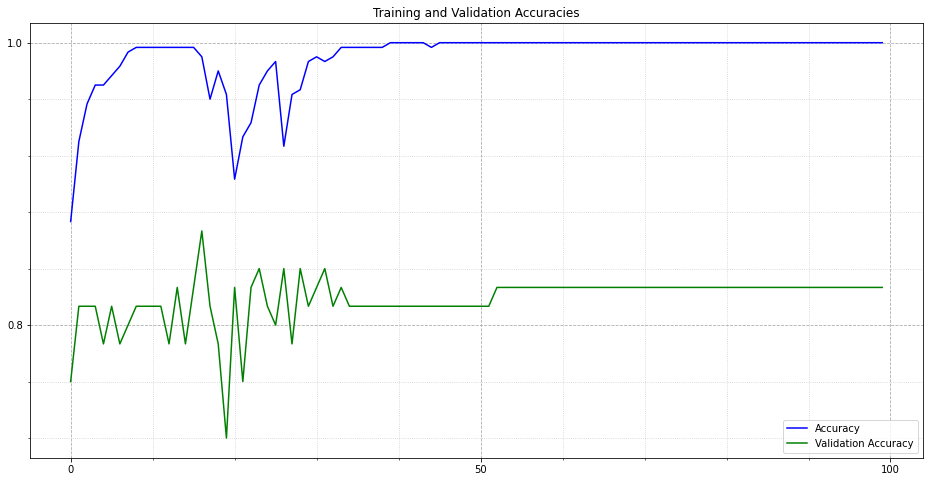

In [27]:
acc_histories = model_records.history['accuracy']
val_acc_histories = model_records.history['val_accuracy']
plt_range = np.arange(0, 100, 1)

#from itertools import chain
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

#plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(figsize=(16, 8))
# plt.plot(plt_range, list(chain.from_iterable(acc_histories)), label='Accuracy')
# plt.plot(plt_range, list(chain.from_iterable(val_acc_histories)), label='Validation Accuracy')
plt.plot(plt_range, acc_histories, label='Accuracy', color="blue")
plt.plot(plt_range, val_acc_histories, label='Validation Accuracy', color="green")



# Change major ticks to show every .10.
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(.20))

# Change minor ticks to show every 10. (10/1 = 10)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#ACACAC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

#plt.grid(True)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracies')

Text(0.5, 1.0, 'Training and Validation Log Losses')

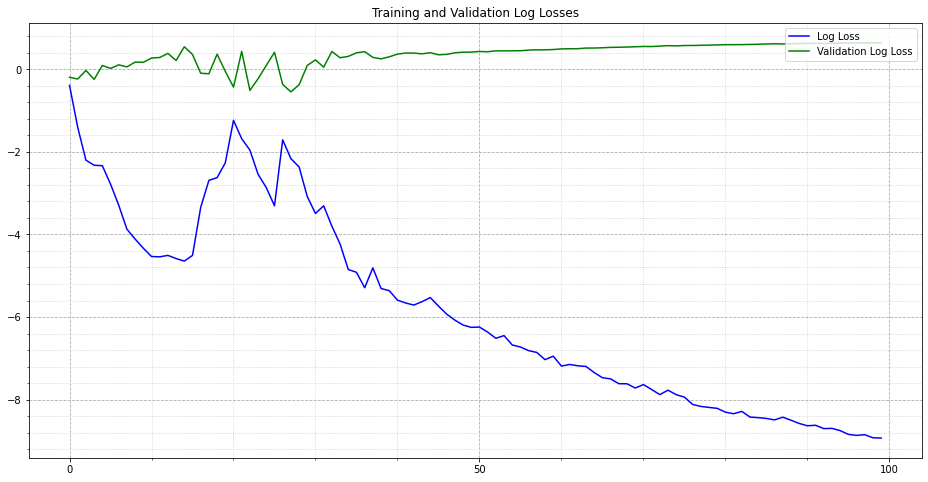

In [28]:
plt_range = range(100)

loss_histories = model_records.history['loss']
val_loss_histories = model_records.history['val_loss']

#from itertools import chain
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import numpy as np

#plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(plt_range, np.log(loss_histories), label='Log Loss', color="blue")
plt.plot(plt_range, np.log(val_loss_histories), label='Validation Log Loss', color="green")



# Change major ticks to show every .10.
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(2))

# Change minor ticks to show every 10. (10/1 = 10)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#ACACAC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

#plt.grid(True)
plt.legend(loc='upper right')
plt.title('Training and Validation Log Losses')

# Performance Measures

In [29]:
tl_model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-2-28-performance-0.79-0.58.hdf5')

In [30]:
predictions = tl_model.predict(X_test) # predict output for all test data

scores = tf.nn.softmax(predictions)
Y_pred = []
for score in scores:
  Y_pred.append(np.argmax(score))
Y_pred = np.array(Y_pred) # predicted labels

In [31]:
Y_true = Y_test # true labels

In [32]:
# Defining function for confusion matrix plot
def plot_confusion_matrix(Y_true, Y_pred, Classes, normalize=False, title=None, cmap=plt.cm.Blues):

    # Compute the confusion matrix
    conf_mat = confusion_matrix(Y_true, Y_pred)
    if normalize:
        conf_mat = conf_mat.astype('float32') / conf_mat.sum(axis=1)[:, np.newaxis]
        print(title)
    else:
        print(title)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(conf_mat.shape[1]), yticks=np.arange(conf_mat.shape[0]),
           xticklabels=Classes, yticklabels=Classes,
           title=title, ylabel='True label', xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
   
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = conf_mat.max() / 2.
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(j, i, format(conf_mat[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_mat[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

np.set_printoptions(precision=2)

Confusion Matrix


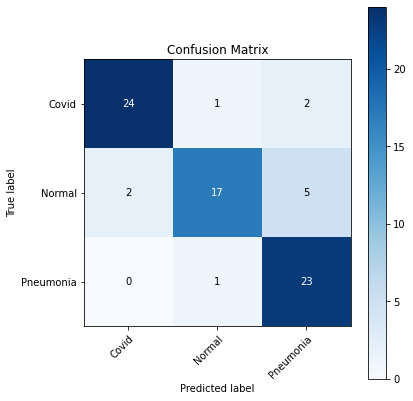

In [33]:
from sklearn.metrics import confusion_matrix

#Plotting the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred)

#Defining the class labels again
Classes = ["Covid", "Normal", "Pneumonia"]

# Plotting non-normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, title='Confusion Matrix')

Confusion Matrix - Normalized


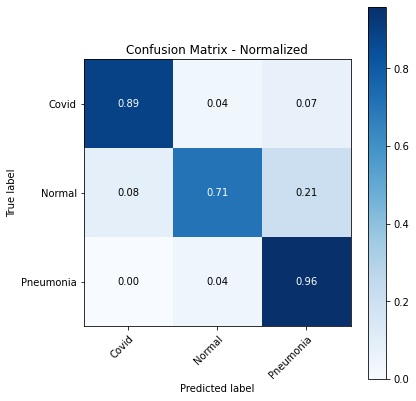

In [34]:
#Plotting normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, normalize = True, title = 'Confusion Matrix - Normalized')

In [35]:
tl_records = tl_model.evaluate(X_test, Y_test)

3/3 [==============================] - 1s 218ms/step - loss: 0.3692 - accuracy: 0.8533


In [36]:
Classes = ["Covid", "Normal", "Pneumonia"]

from sklearn import metrics

def get_metrics(true_labels, predicted_labels):
  print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
  print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'),4))
  print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4))
  print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4))

get_metrics(Y_true, Y_pred)
  
def display_classification_report(true_labels, predicted_labels, Classes):
  report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=Classes)
  print("\nReport:\n"+report)

display_classification_report(Y_true, Y_pred, Classes)

Accuracy: 0.8533
Precision: 0.864
Recall: 0.8533
F1 Score: 0.8517

Report:
              precision    recall  f1-score   support

       Covid       0.92      0.89      0.91        27
      Normal       0.89      0.71      0.79        24
   Pneumonia       0.77      0.96      0.85        24

    accuracy                           0.85        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.86      0.85      0.85        75



ROC AUC score: 0.8895697167755992


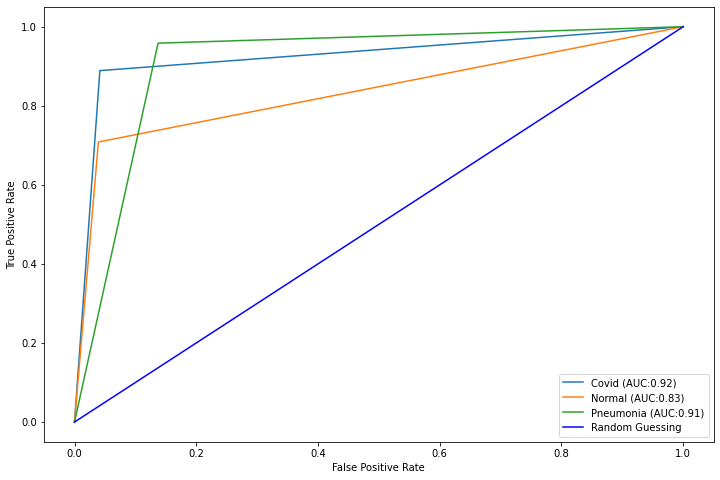

In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= Classes

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  
  for (idx, c_label) in enumerate(target):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
  
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# Exploitation on third good model found in Optimization

In [38]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-v2-2.hdf5')

In [39]:
from keras.utils.layer_utils import count_params

model.compile(
      loss = "sparse_categorical_crossentropy",
      optimizer = "adam",
      metrics = ["accuracy"],
  )

trainable_count = count_params(model.trainable_weights)
non_trainable_count = count_params(model.non_trainable_weights)

print("Total: ", trainable_count+non_trainable_count, " Trainable: ", trainable_count, " Non-Trainable: ", non_trainable_count)

Total:  14788803  Trainable:  3247043  Non-Trainable:  11541760


# Compile and Train (Exploit)

In [40]:
model.compile(
        loss = "sparse_categorical_crossentropy",
        optimizer = "adam",
        metrics = ["accuracy"],
    )

filepath = '/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-3-{epoch:02d}-performance-{val_accuracy:.2f}-{val_loss:.2f}.hdf5'

checkpoint_acc = ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

checkpoint_loss = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

callbacks = [checkpoint_acc, checkpoint_loss]

epochs = 100
model_records = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_val, Y_val), callbacks=callbacks)


Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 1.3598 - accuracy: 0.7633
Epoch 1: val_accuracy improved from -inf to 0.61333, saving model to /content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-3-01-performance-0.61-0.83.hdf5

Epoch 1: val_loss improved from inf to 0.83236, saving model to /content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-3-01-performance-0.61-0.83.hdf5
10/10 [==============================] - 10s 796ms/step - loss: 1.3598 - accuracy: 0.7633 - val_loss: 0.8324 - val_accuracy: 0.6133
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.3975 - accuracy: 0.8500
Epoch 2: val_accuracy improved from 0.61333 to 0.84000, saving model to /content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-3-02-performance-0.84-0.48.hdf5

Epoch 2: val_loss improved from 0.83236 to 0.48481, saving model to /content/drive/MyDrive

# Learning Visualization

Text(0.5, 1.0, 'Training and Validation Accuracies')

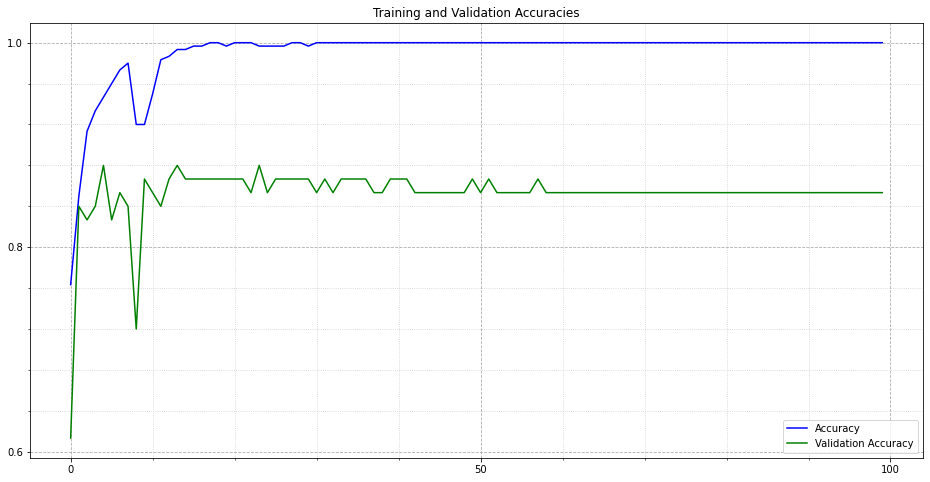

In [43]:
acc_histories = model_records.history['accuracy']
val_acc_histories = model_records.history['val_accuracy']
plt_range = np.arange(0, 100, 1)

#from itertools import chain
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

#plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(figsize=(16, 8))
# plt.plot(plt_range, list(chain.from_iterable(acc_histories)), label='Accuracy')
# plt.plot(plt_range, list(chain.from_iterable(val_acc_histories)), label='Validation Accuracy')
plt.plot(plt_range, acc_histories, label='Accuracy', color="blue")
plt.plot(plt_range, val_acc_histories, label='Validation Accuracy', color="green")



# Change major ticks to show every .10.
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(.20))

# Change minor ticks to show every 10. (10/1 = 10)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#ACACAC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

#plt.grid(True)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracies')

Text(0.5, 1.0, 'Training and Validation Log Losses')

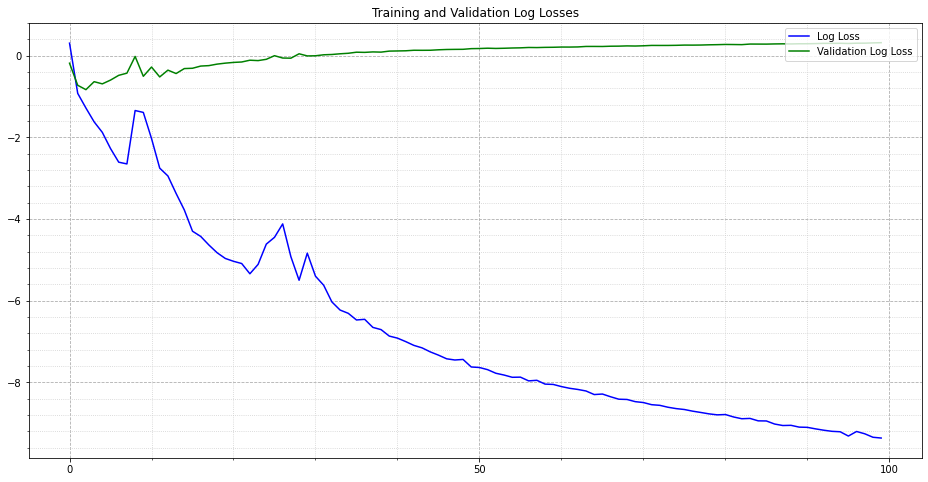

In [44]:
plt_range = range(100)

loss_histories = model_records.history['loss']
val_loss_histories = model_records.history['val_loss']

#from itertools import chain
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import numpy as np

#plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(plt_range, np.log(loss_histories), label='Log Loss', color="blue")
plt.plot(plt_range, np.log(val_loss_histories), label='Validation Log Loss', color="green")



# Change major ticks to show every .10.
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(2))

# Change minor ticks to show every 10. (10/1 = 10)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#ACACAC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

#plt.grid(True)
plt.legend(loc='upper right')
plt.title('Training and Validation Log Losses')

# Performance Measures

In [45]:
tl_model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Models/model-exploit-3-05-performance-0.88-0.50.hdf5')

In [46]:
predictions = tl_model.predict(X_test) # predict output for all test data

scores = tf.nn.softmax(predictions)
Y_pred = []
for score in scores:
  Y_pred.append(np.argmax(score))
Y_pred = np.array(Y_pred) # predicted labels

In [47]:
Y_true = Y_test # true labels

In [48]:
# Defining function for confusion matrix plot
def plot_confusion_matrix(Y_true, Y_pred, Classes, normalize=False, title=None, cmap=plt.cm.Blues):

    # Compute the confusion matrix
    conf_mat = confusion_matrix(Y_true, Y_pred)
    if normalize:
        conf_mat = conf_mat.astype('float32') / conf_mat.sum(axis=1)[:, np.newaxis]
        print(title)
    else:
        print(title)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(conf_mat.shape[1]), yticks=np.arange(conf_mat.shape[0]),
           xticklabels=Classes, yticklabels=Classes,
           title=title, ylabel='True label', xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
   
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = conf_mat.max() / 2.
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(j, i, format(conf_mat[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_mat[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

np.set_printoptions(precision=2)

Confusion Matrix


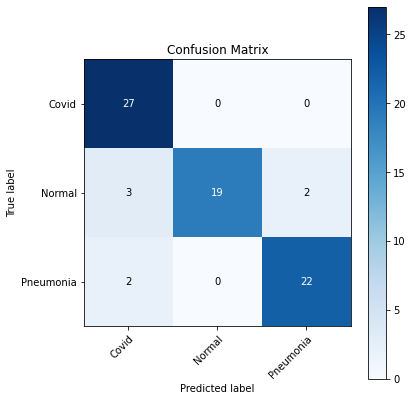

In [49]:
from sklearn.metrics import confusion_matrix

#Plotting the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred)

#Defining the class labels again
Classes = ["Covid", "Normal", "Pneumonia"]

# Plotting non-normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, title='Confusion Matrix')

Confusion Matrix - Normalized


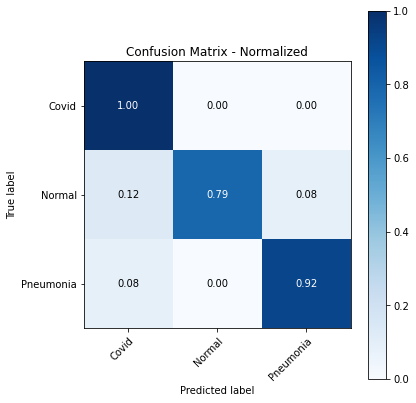

In [50]:
#Plotting normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, normalize = True, title = 'Confusion Matrix - Normalized')

In [51]:
tl_records = tl_model.evaluate(X_test, Y_test)

3/3 [==============================] - 1s 225ms/step - loss: 0.2398 - accuracy: 0.9067


In [52]:
Classes = ["Covid", "Normal", "Pneumonia"]

from sklearn import metrics

def get_metrics(true_labels, predicted_labels):
  print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
  print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'),4))
  print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4))
  print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4))

get_metrics(Y_true, Y_pred)
  
def display_classification_report(true_labels, predicted_labels, Classes):
  report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=Classes)
  print("\nReport:\n"+report)

display_classification_report(Y_true, Y_pred, Classes)

Accuracy: 0.9067
Precision: 0.9171
Recall: 0.9067
F1 Score: 0.9056

Report:
              precision    recall  f1-score   support

       Covid       0.84      1.00      0.92        27
      Normal       1.00      0.79      0.88        24
   Pneumonia       0.92      0.92      0.92        24

    accuracy                           0.91        75
   macro avg       0.92      0.90      0.91        75
weighted avg       0.92      0.91      0.91        75



ROC AUC score: 0.9274918300653594


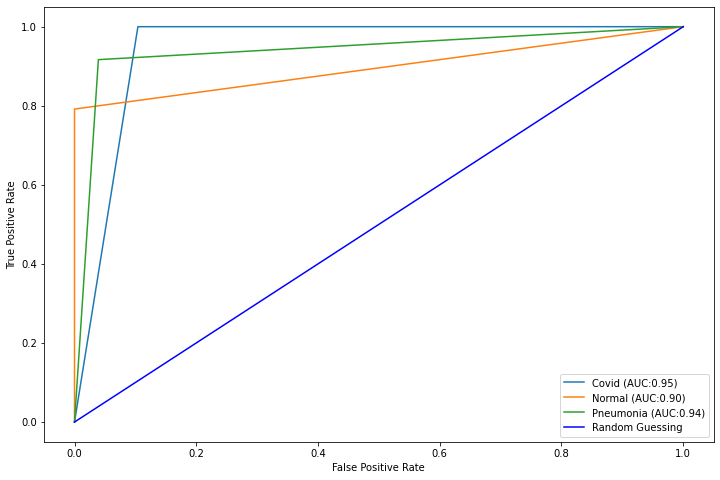

In [53]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= Classes

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  
  for (idx, c_label) in enumerate(target):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
  
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()